<a href="https://colab.research.google.com/github/willewiik/Time-Series-and-Sequence-Learning/blob/main/old_exams/exam_22_02_16_TS/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/willewiik/Time-Series-and-Sequence-Learning.git
%cd "Time-Series-and-Sequence-Learning/old_exams/exam_22_02_16_TS"

Cloning into 'Time-Series-and-Sequence-Learning'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 69 (delta 25), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (69/69), 1.10 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/Time-Series-and-Sequence-Learning/old_exams/exam_22_02_16_TS/Time-Series-and-Sequence-Learning/old_exams/exam_22_02_16_TS


# Problem 2
(11 points)

**a)** In this problem we will study a **structural time series** model.
$$
    \begin{cases} \alpha_t = T \alpha_{t-1} + R \eta_t, & \eta_t \sim \mathcal{N}(0,Q), \\ y_t = Z \alpha_t + \varepsilon_t, & \varepsilon_t \sim \mathcal{N}(0,H), \end{cases}
$$
where $\alpha_t$ contains a trend and seasonal part.
The trend in this model is **linear** but the seasonality is unknown.
We let the variances of the model be $\sigma_{\mu}^2 = 0.1^2$, $\sigma_{\gamma}^2 = 0.1^2$, and $\sigma_{\varepsilon}^2 = 1$.

The data file `data_problem2.csv` contains a sequence of observations from this model over a few years. Using this data you are tasked to do the following:

1. Look at the provided data and find the seasonality $s$.
2. Setup the complete model by writing down the matrices $T$, $R$, $Q$, $Z$, and $H$. Also specify your hidden states $\alpha_t$. Remember to motivate your choices of matrices.
3. Set up the mean vector of the initial distribution such that
    * The trend component starts at the first observation,
    * The slope of the trend is _a priori_ zero in expectation,
    * The initial mean of all states related to the seasonal component are zero.
4. Set up the initial covariance matrix as a diagonal matrix with 100 on the diagonal.

<div style="text-align: right"> (4p) </div>

   Unnamed: 0       Data         t
0           0 -11.202224  0.000000
1           1  -3.668513  0.135501
2           2 -10.393834  0.271003
3           3 -10.634280  0.406504
4           4  -9.975625  0.542005


Text(0, 0.5, 'y')

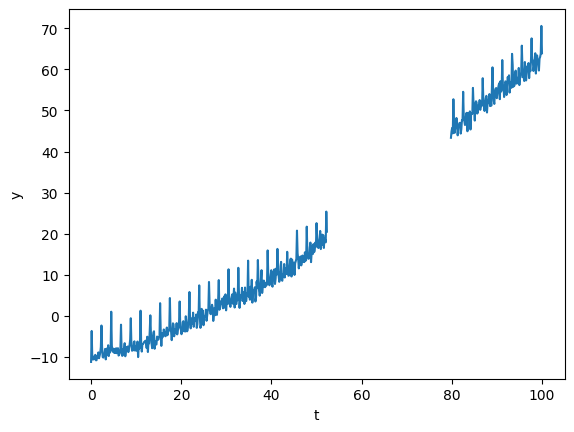

In [14]:
data = pd.read_csv('data_problem2.csv',header=0)
print(data.head())
y = data['Data'].values
u = data['t'].values

from tssltools import LGSS

plt.plot(u,y)
plt.xlabel('t')
plt.ylabel('y')

739


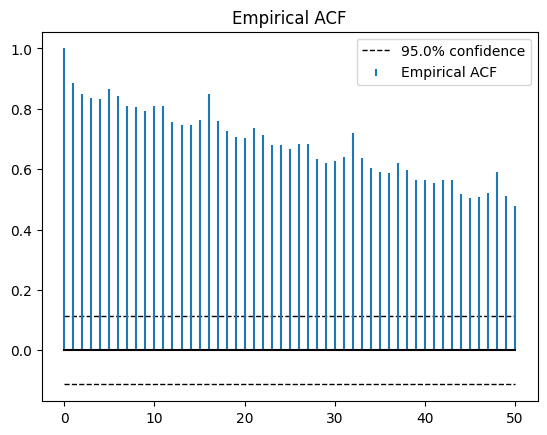

In [18]:
from tssltools import acfplot
print(len(y))
acfplot(y[1:300,], lags = 50)
# s = 16
# then s = 15

**Solution:**

In [34]:
from scipy.linalg import block_diag
s = 16
Tmu = np.ndarray(shape = (2,2), buffer = np.array([2,-1,1,0]), dtype = int)
Tgamma = np.zeros([s-1,s-1])
Tgamma[0] = -1
Tgamma[1:,0:(s-1-1)] = np.eye(s-1-1)
T = block_diag(Tmu,Tgamma)
print(T)

Rmu = np.ndarray(shape = (2,1), buffer = np.array([1,0]), dtype = int)
Zmu = np.ndarray(shape = (1,2), buffer = np.array([1,0]), dtype = int)
Rgamma = np.zeros([s-1,1])
Rgamma[0] = 1
Zgamma = np.zeros([1,s-1])
Zgamma[0] = 1

Z = np.concatenate((Zmu,Zgamma),axis = 1)
R = block_diag(Rmu,Rgamma)
print(R)
print(Z)

a1 = np.zeros([s+1, 1]).flatten()
a1[0] = y[0]
a1[1] = y[0]

sigma_trend = 0.1
sigma_seasonal = 0.1
sigma_error = 1

Q = np.array([[sigma_trend**2,0],[0,sigma_seasonal**2]])

P1 = np.diag(np.ones(s+1)) * 100


[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0. 

___

**b)** As you notice when looking at the data there are a bunch of missing observations. You want to fill in the gaps and remember that the Kalman filter can do that. Your colleague on the other hand always talk about the Kalman smoother as the correct thing to use.

1. Discuss the difference between these two algorithms in a few sentences.
2. Run both of the algorithms on the data.
3. Plot the estimates $\pm 1$ standard deviation of $Z \alpha_t$ for the entire dataset. There should be an estimate from the Kalman filter results and one estimate from the Kalman smoother.
4. Comment on the results.

<div style="text-align: right"> (4p) </div>

**Solution:**

(17, 1, 739)


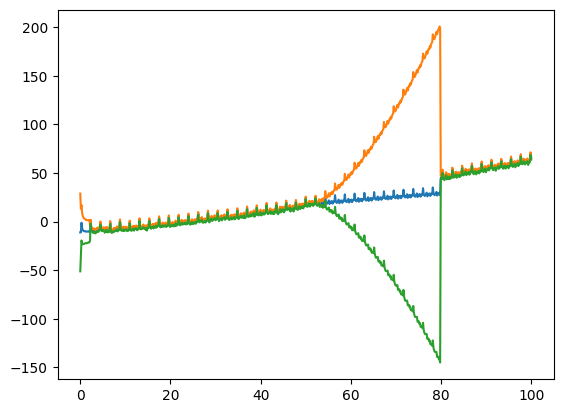

In [42]:
from tssltools import kalman_filter, kalman_smoother, LGSS

n = len(y)

model = LGSS(T, R, Q, Z, sigma_error, a1, P1)
kf = kalman_filter(y, model)
ks = kalman_smoother(y, model, kf)
print(ks.alpha_sm.shape)
smooth_pred = (Z @ ks.alpha_sm.reshape(17,739)).flatten()
smooth_var =  (Z @ ks.V.T @ Z.T).flatten()

plt.plot(u, kf.y_pred, label = 'Kalman filter')
plt.plot(u, kf.y_pred + np.sqrt(kf.F_pred), label = 'kalman upper')
plt.plot(u, kf.y_pred - np.sqrt(kf.F_pred), label = 'kalman lower')








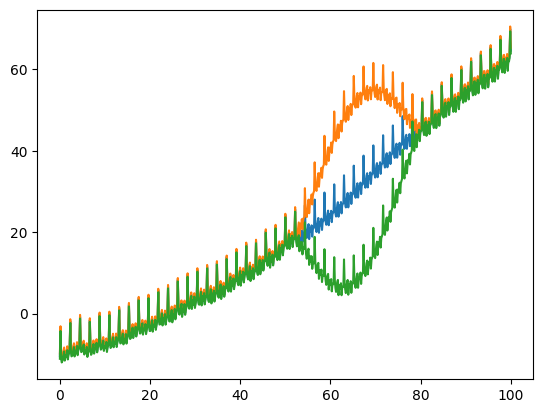

In [43]:
plt.plot(u, smooth_pred, label = 'Smoother filter')
plt.plot(u, smooth_pred + np.sqrt(smooth_var), label = 'Smoother upper')
plt.plot(u, smooth_pred - np.sqrt(smooth_var), label = 'Smoother lower')

___

**c)** For these models we have a few parameters that may be known or unkown. Another colleague comes and asks you how to estimate them. Discuss **two** different methods to estimate the parameters. In your discussion you should comment on what algorithms are needed for your choosen methods, pros/cons of your methods and ease of implementation.

<div style="text-align: right"> (3p) </div>

**Solution:**